# Ensemple Learning
- When wise people make critical decisions, they usually take into account the opinions of **several experts**.

- An obvious approach to making decisions more reliable is to **combine the output of different models**(Experts).

- Several machine learning techniques do this by learning an ensemble of models *(e.g. bagging, boosting, and stacking)*.

- There is no single learning algorithm that in any domain always induces the most accurate learner.

***Ensemble learning:***
- We construct a group of base learners which, when **combined**, has *higher accuracy* than the individual learners.
- The base learners are usually not chosen for their accuracy, but for their **simplicity**.
- The base learners should be accurate *on different instances*, specializing in different subdomains of the problem, so that they can complement each other.


# 1.Voting classifiers

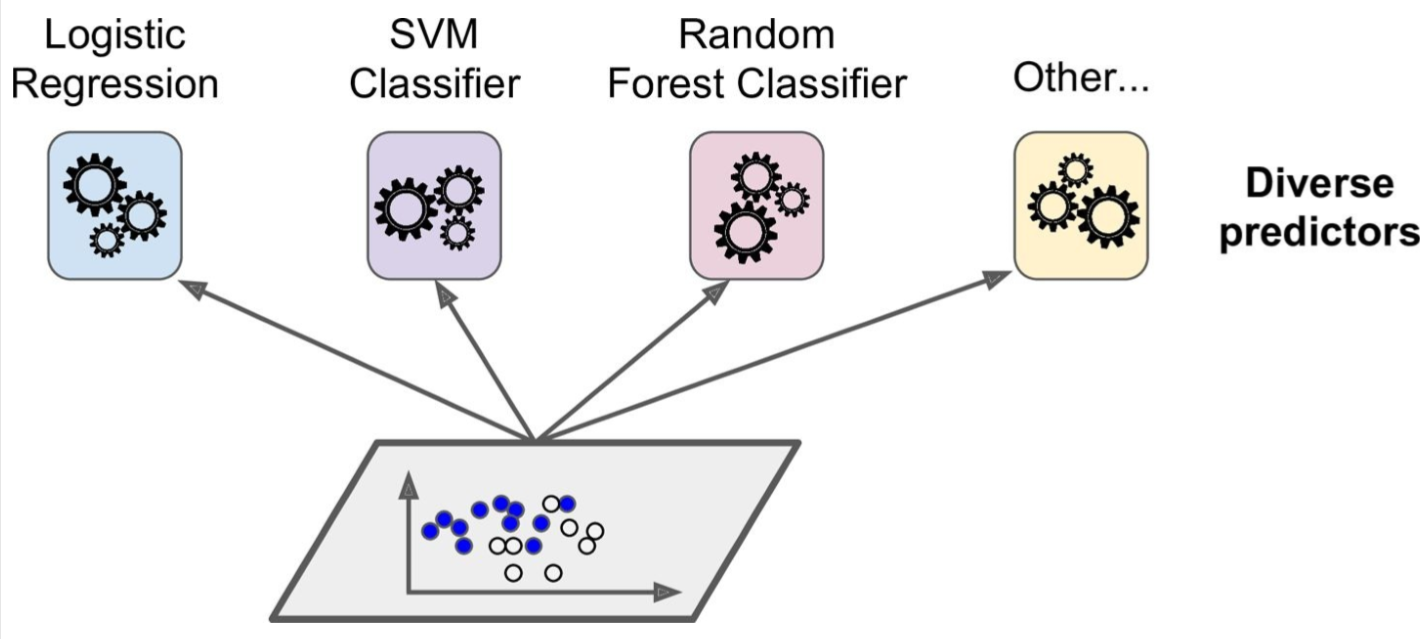

In [ ]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Breast cancer dataset for classification
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 42)

nbclf = GaussianNB()

dtclf = DecisionTreeClassifier(random_state = 42)

lgclf = LogisticRegression(random_state = 42)


### Hard voting: 
majority vote

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', lgclf), ('dt', dtclf), ('nb', nbclf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (lgclf, dtclf, nbclf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('Accuracy of {} classifier on training set: {:.2f}'
     .format(clf.__class__.__name__,clf.score(X_train, y_train)))
    print('Accuracy of {} classifier on test set: {:.2f}'
     .format(clf.__class__.__name__,clf.score(X_test, y_test)))
    print()

### Soft voting:  
gives  moreweight  to  highly  confident (more accurate) votes

In [ ]:
log_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
nb_clf = GaussianNB()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', dt_clf), ('nb', nb_clf)],
    voting='soft')

voting_clf.fit(X_train, y_train)
for clf in (log_clf, dt_clf, nb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('\n Accuracy of {} classifier on training set: {:.2f}'
     .format(clf.__class__.__name__,clf.score(X_train, y_train)))
    print('Accuracy of {} classifier on test set: {:.2f}'
     .format(clf.__class__.__name__,clf.score(X_test, y_test)))

# 2. Bagging and	Pasting
use	**the	same	training	algorithm**	for	every	predictor,	but	to	train	them	on	different **random	subsets	of	the	training	set**.	When	sampling	is	performed	with	replacement,	this	method	is	called bagging	(short	for	bootstrap	aggregating).	When	sampling	is	performed	without	replacement,	it	is called	pasting.
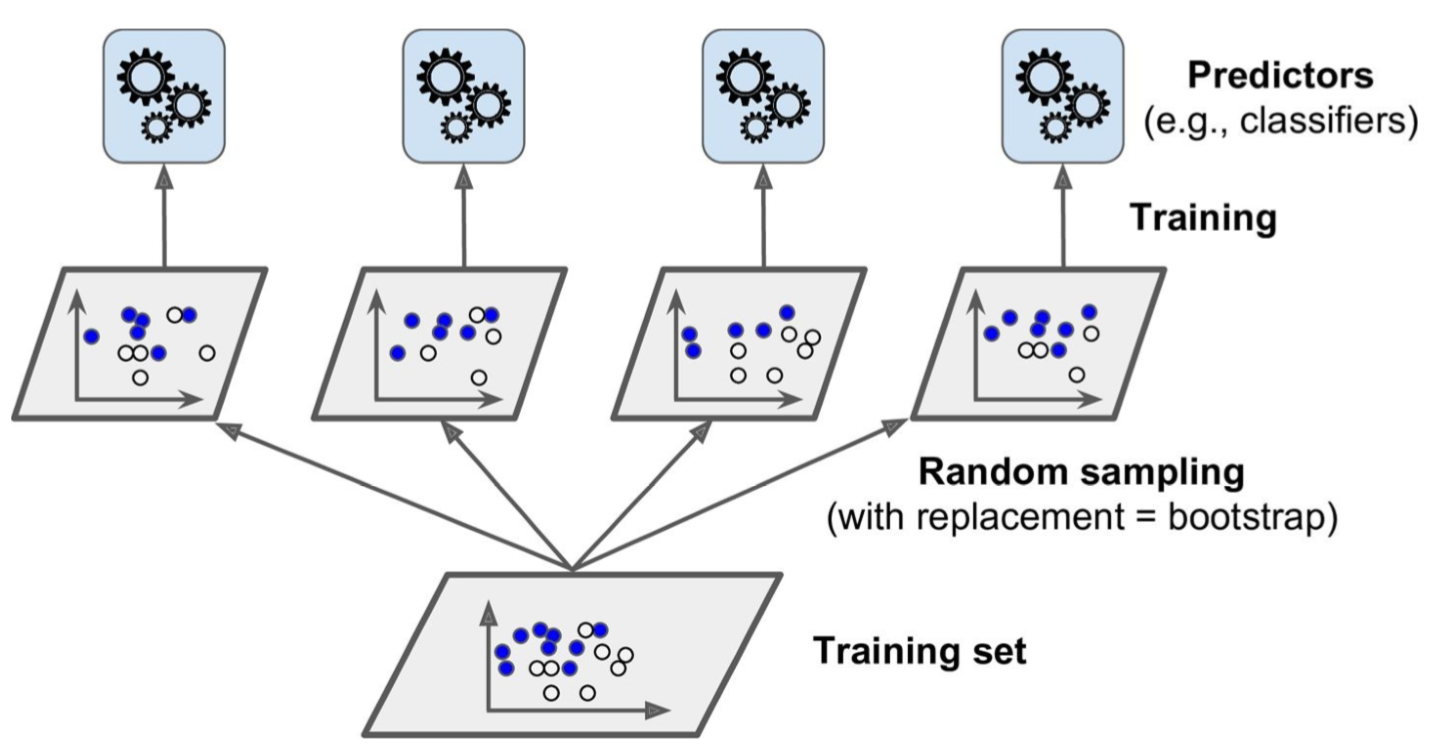

perform bagging on DecisionTreeClassifier using 500 estimators, using 100  sampless for each classifier, using all porcessors (n_jobs=-1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

As  you  can  see,  the  ensemble’s  predictions  will  likely generalize much better than the single Decision Tree’s predictions: the ensemble has a comparable bias but a smaller variance (it makes roughly the same number of errors on the training set, but the decision boundary is less irregular).

## Out-of-Bag evaluation
With	bagging,	some	instances	may	be	sampled	several	times	for	any	given	predictor,	while	others	may	not be	sampled	at	all.	

By	default	a	BaggingClassifier	samples	m	training	instances	with	replacement (bootstrap=True),	where	m	is	the	size	of	the	training	set.

This	means	that	only	about	63%	of	the	training instances	are	sampled	on	average	for	each	predictor.

The	remaining	37%	of	the	training	instances	that	are not	sampled	are	called	out-of-bag	(oob)	instances.

Note	that	they	are	not	the	same	37%	for	all	predictors.

Since	a	predictor	never	sees	the	oob	instances	during	training,	it	can	be	evaluated	on	these	instances, without	the	need	for	a	separate	validation	set	or	cross-validation.	You	can	evaluate	the	ensemble	itself	by averaging	out	the	oob	evaluations	of	each	predictor. 

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

# Random Forests
Random Forest  is an ensemble of Decision Trees, generally trained  via  the  bagging  method  (or  sometimes  pasting),  typically  with  max_samples set to the size of the training set.
Instead of building a BaggingClassifier and pass‐ing it a DecisionTreeClassifier, you can instead use the RandomForestClassifierclass, which is more convenient and optimized for Decision Trees

In [ ]:
# compare BaggingClassifier predictions with RandomForestClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42,max_leaf_nodes=16),
    n_estimators=500,max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(rnd_clf.score(X_test, y_test))


In [ ]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions